In [18]:
import pip
%pip install pandas geopandas geopy matplotlib seaborn descartes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline


Note: you may need to restart the kernel to use updated packages.


In [19]:
athletes = pd.read_csv('athlete_events.csv')
athletes


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [20]:
athletes.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


<AxesSubplot:>

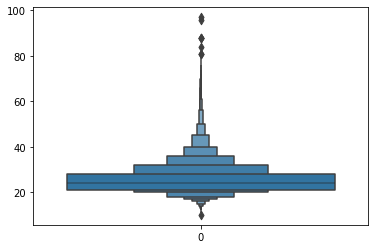

In [21]:
sns.boxenplot(data=athletes['Age'])

In [23]:
athletes.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [24]:
athletes[athletes['Age'].max() == athletes["Age"]]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


In [25]:
athletes[athletes['Age'].min() == athletes["Age"]]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


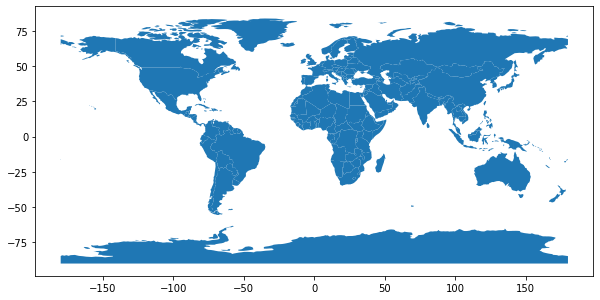

In [26]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.set_geometry('geometry')
world.plot(figsize=(10,10))
plt.show()

In [27]:
merge = world.set_index('iso_a3').join(athletes.set_index('NOC'))
merge.head()

,pop_est,continent,name,gdp_md_est,geometry,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
-99,5320045,Europe,Norway,364700.0,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-99,67106161,Europe,France,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-99,265100,Asia,N. Cyprus,3600.0,"POLYGON ((32.73178 35.14003, 32.80247 35.14550...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-99,3500000,Africa,Somaliland,12250.0,"POLYGON ((48.94820 11.41062, 48.94820 11.41062...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-99,1895250,Europe,Kosovo,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

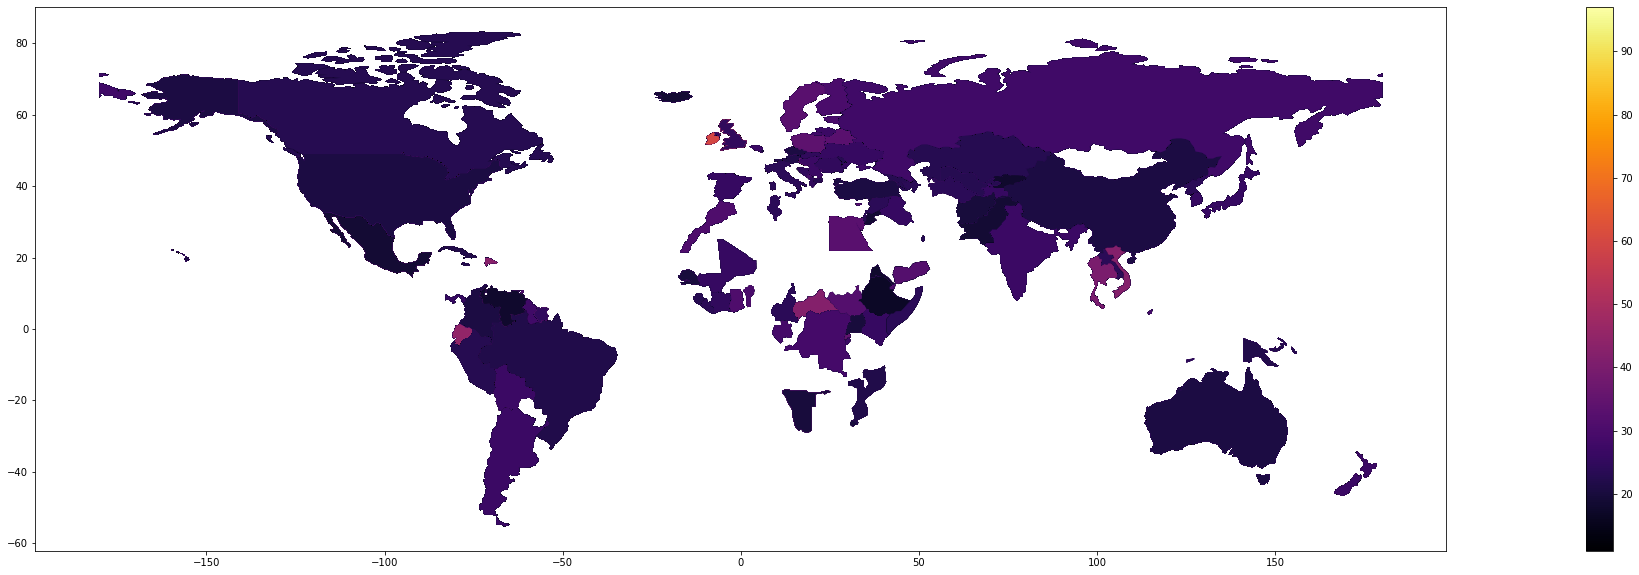

In [28]:
merge.plot(column='Age',figsize=(50,10), cmap= 'inferno', legend=True ) 

<AxesSubplot:>

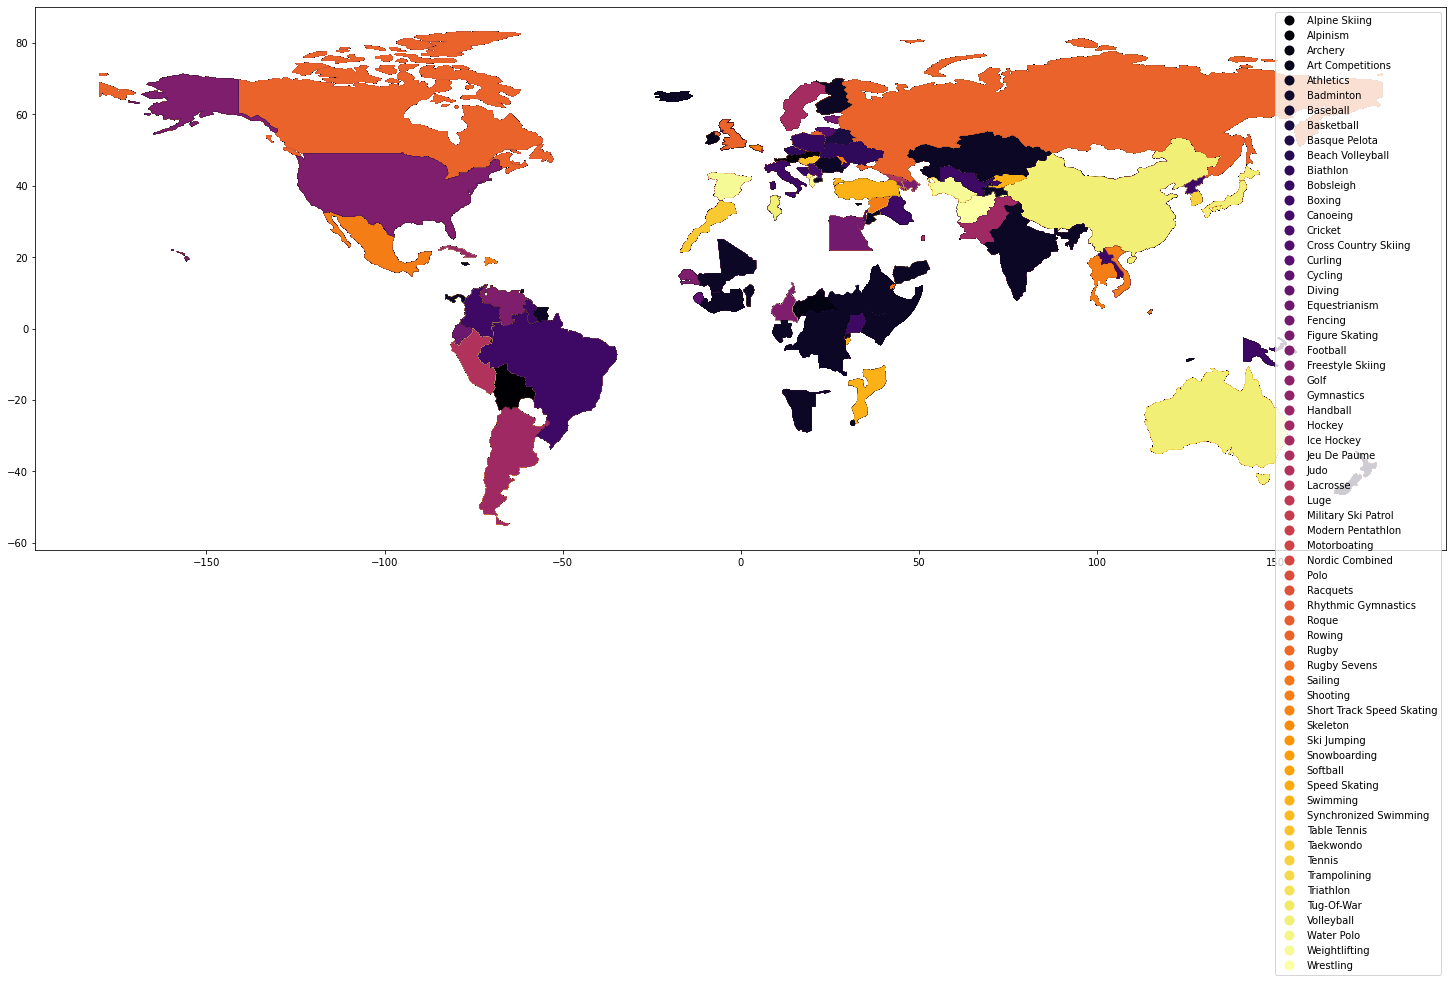

In [29]:
merge.plot(column='Sport',figsize=(50,10), cmap= 'inferno', legend=True ) 

<AxesSubplot:>

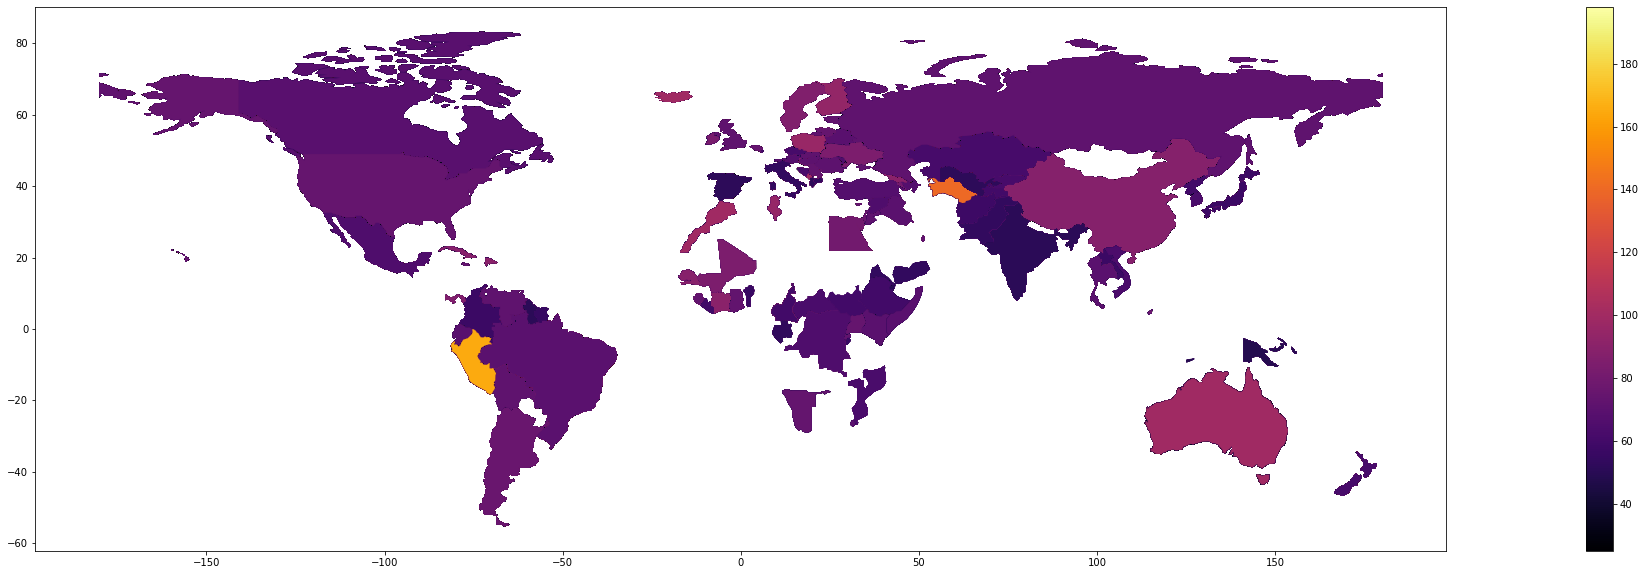

In [30]:
merge.plot(column='Weight',figsize=(50,10), cmap= 'inferno', legend=True ) 

<AxesSubplot:>

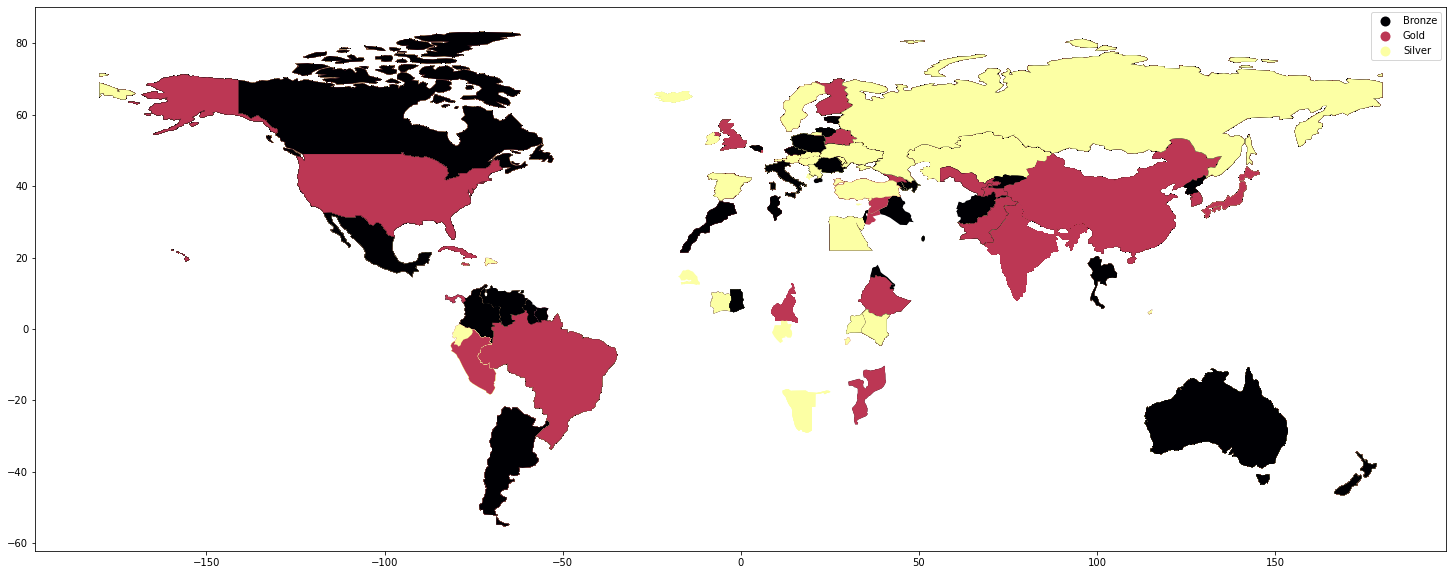

In [31]:
merge.plot(column='Medal',figsize=(50,10), cmap= 'inferno', legend=True ) 

In [32]:
len(athletes.Sport.unique())

66

<AxesSubplot:xlabel='Age', ylabel='NOC'>

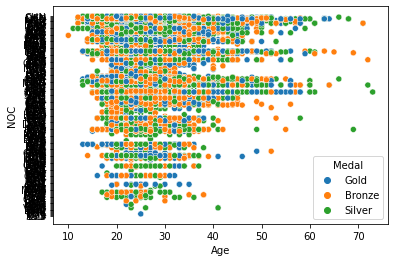

In [33]:
sns.scatterplot(data=athletes, x='Age',y='NOC'
, hue='Medal')



<AxesSubplot:>

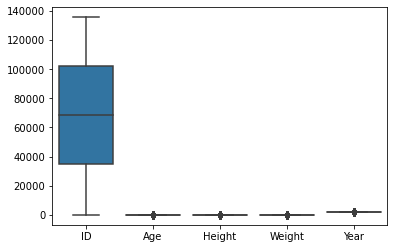

In [34]:
sns.boxplot(data=athletes)

In [58]:
without_id = list(athletes.columns)
without_id = athletes
#without_id.drop("ID", axis=1, inplace=True)
#new_athletes = athletes.loc[:,without_id]
without_id.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


<AxesSubplot:>

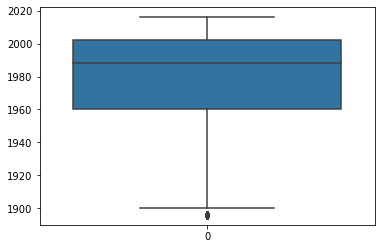

In [51]:
sns.boxplot(data=without_id)

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

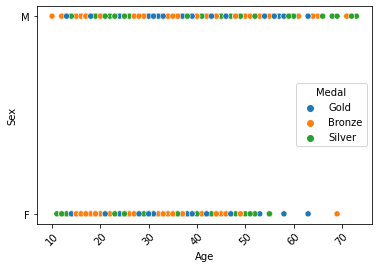

In [78]:
sns.scatterplot(data=athletes, x=athletes.Age, y=athletes.Sex, hue='Medal' )
plt.xticks(rotation=45)

In [97]:
df_art = athletes[athletes['Sport'] == "Art Competitions"]
df_art

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
58,Win Valdemar Aaltonen,M,54.0,NaN,NaN,Finland,FIN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
669,Adolf Gaston Abel,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
670,Adolf Gaston Abel,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
1203,Georges Achille-Fould,F,55.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Painting,NaN
1251,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270200,Henri Achille Zo,M,58.0,NaN,NaN,France,FRA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
270352,William Zorach,M,45.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
270561,"Erich Wilhelm Julius, Freiherr Gans Edler, Her...",M,44.0,NaN,NaN,Germany,GER,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Architecture, Unknown E...",NaN
270955,Jacek uawski,M,41.0,NaN,NaN,Poland,POL,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


In [100]:
df_art['Year'].max()


1948

In [101]:
df_art['Year'].min()

1912

In [120]:
df_gymnastics = athletes[athletes['Sport'] == "Gymnastics"]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
41,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
43,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Floor Exercise,NaN
44,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
45,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Parallel Bars,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270911,Tanja uti (-Kober),F,25.0,NaN,NaN,Yugoslavia,YUG,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Balance Beam,NaN
270914,"Jules Alexis ""Louis"" Zutter",M,30.0,NaN,NaN,Switzerland,SUI,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,Silver
270915,"Jules Alexis ""Louis"" Zutter",M,30.0,NaN,NaN,Switzerland,SUI,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,Silver
270916,"Jules Alexis ""Louis"" Zutter",M,30.0,NaN,NaN,Switzerland,SUI,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horizontal Bar,NaN


In [121]:
df_gymnastics['Year'].max()

2016

In [122]:
mergeGym = world.set_index('iso_a3').join(df_gymnastics.set_index('NOC'))
mergeGym.head()

,pop_est,continent,name,gdp_md_est,geometry,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
-99,5320045,Europe,Norway,364700.0,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-99,67106161,Europe,France,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-99,265100,Asia,N. Cyprus,3600.0,"POLYGON ((32.73178 35.14003, 32.80247 35.14550...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-99,3500000,Africa,Somaliland,12250.0,"POLYGON ((48.94820 11.41062, 48.94820 11.41062...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-99,1895250,Europe,Kosovo,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

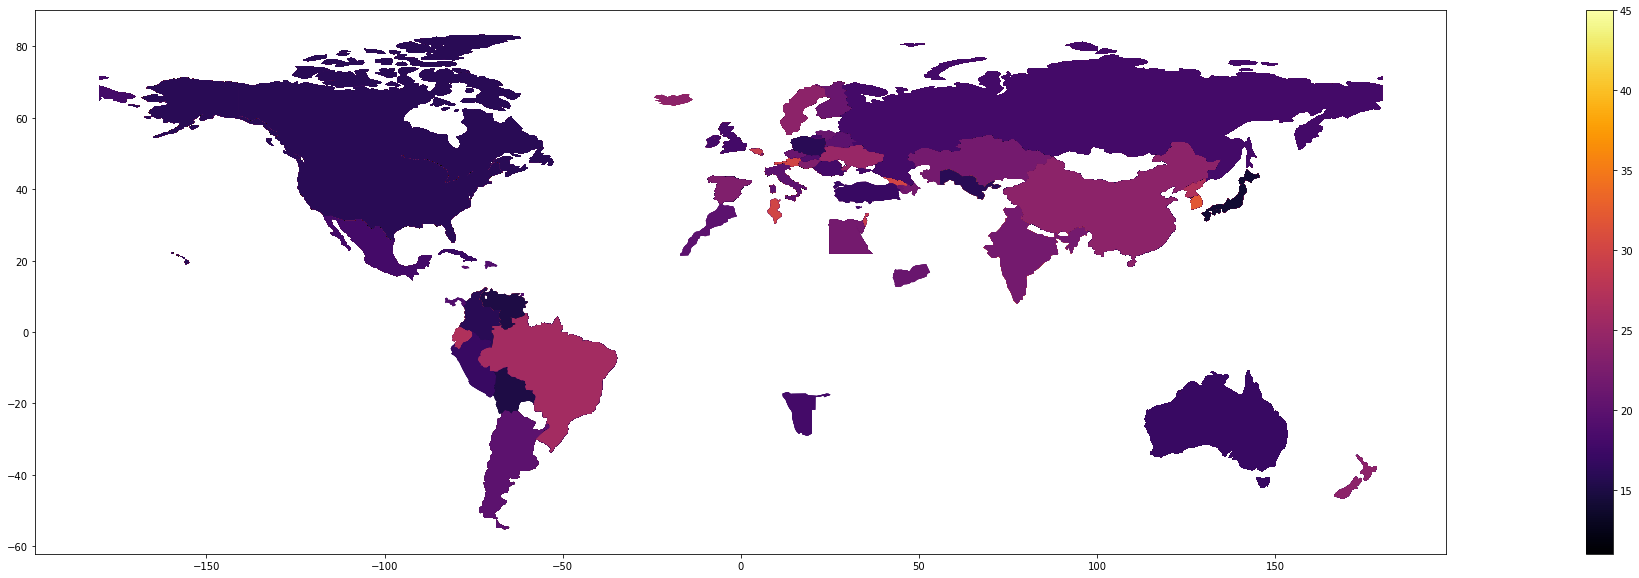

In [124]:
mergeGym.plot(column='Age',figsize=(50,10), cmap= 'inferno', legend=True )

<AxesSubplot:>

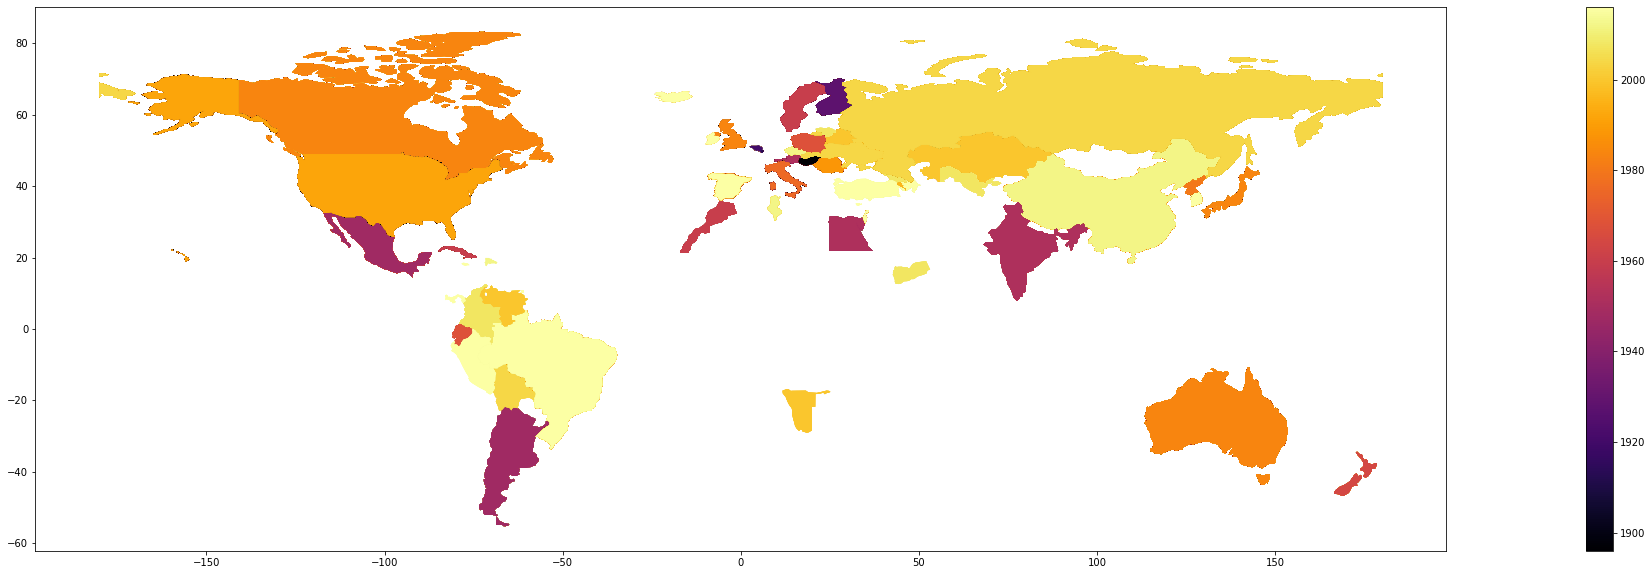

In [125]:
mergeGym.plot(column='Year',figsize=(50,10), cmap= 'inferno', legend=True )

NameError: name 'athletes' is not defined